In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import rand, randn, choice, permutation
from scipy.linalg import hadamard

import torch
import torch.nn.functional as F

import tensorly as tl
from tensorly import decomposition
from tensorly.decomposition import parafac
from scipy import linalg
import scipy.io

In [2]:
mat = scipy.io.loadmat('candle_data.mat')

In [3]:
%run KZTIHT_Functions.ipynb
%run "Adaptive Row Removal Functions.ipynb"
colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

In [4]:
data = mat['candle_data'][29:59,18:48,::2]
data_tensor = torch.tensor(data)

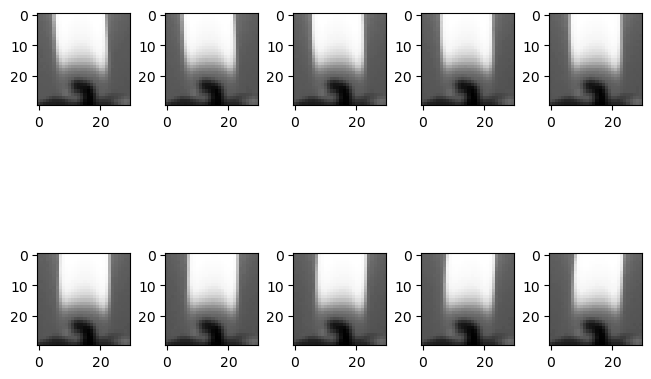

In [5]:
f, axarr = plt.subplots(2,5,constrained_layout=True)
for i in range(5):
    axarr[0,i].imshow(data_tensor[:,:,i], cmap='gray')
for i in range(5):
    axarr[1,i].imshow(data_tensor[:,:,i+5], cmap='gray')

In [6]:
#Low-Rank HOSVD Fitting

r_1 = range(1,10)
r_2 = range(1,10)
r_3 = range(1,6)

for k_1 in r_1:
    for k_2 in r_2:
        for k_3 in r_3:
            approx = HOSVD_rank_app(data_tensor,[k_1,k_2,k_3])
            approx_err = np.linalg.norm(vectorize_tl(approx-data_tensor))/np.linalg.norm(vectorize_tl(data_tensor))
            print("Error for rank (", k_1, ",", k_2, ",",k_3,") is:",approx_err)


Error for rank ( 1 , 1 , 1 ) is: 0.14703083711342754
Error for rank ( 1 , 1 , 2 ) is: 0.14703083711342757
Error for rank ( 1 , 1 , 3 ) is: 0.14703083711342757
Error for rank ( 1 , 1 , 4 ) is: 0.14703083711342757
Error for rank ( 1 , 1 , 5 ) is: 0.14703083711342754
Error for rank ( 1 , 2 , 1 ) is: 0.14703083711342757
Error for rank ( 1 , 2 , 2 ) is: 0.13857268417933188
Error for rank ( 1 , 2 , 3 ) is: 0.13857268417670976
Error for rank ( 1 , 2 , 4 ) is: 0.13857268417670882
Error for rank ( 1 , 2 , 5 ) is: 0.13857268417670807
Error for rank ( 1 , 3 , 1 ) is: 0.14703083711342757
Error for rank ( 1 , 3 , 2 ) is: 0.13857268417920407
Error for rank ( 1 , 3 , 3 ) is: 0.13787445533631262
Error for rank ( 1 , 3 , 4 ) is: 0.13787445526539002
Error for rank ( 1 , 3 , 5 ) is: 0.1378744552653895
Error for rank ( 1 , 4 , 1 ) is: 0.14703083711342754
Error for rank ( 1 , 4 , 2 ) is: 0.13857268417920493
Error for rank ( 1 , 4 , 3 ) is: 0.13787445533625392
Error for rank ( 1 , 4 , 4 ) is: 0.137705448452

Error for rank ( 4 , 7 , 4 ) is: 0.024771022921866136
Error for rank ( 4 , 7 , 5 ) is: 0.02474565689033587
Error for rank ( 4 , 8 , 1 ) is: 0.06137145299496442
Error for rank ( 4 , 8 , 2 ) is: 0.03003680341762011
Error for rank ( 4 , 8 , 3 ) is: 0.025834157293004707
Error for rank ( 4 , 8 , 4 ) is: 0.024691103030414233
Error for rank ( 4 , 8 , 5 ) is: 0.02464144898186367
Error for rank ( 4 , 9 , 1 ) is: 0.061371452963773214
Error for rank ( 4 , 9 , 2 ) is: 0.03003680312107288
Error for rank ( 4 , 9 , 3 ) is: 0.025821409683033692
Error for rank ( 4 , 9 , 4 ) is: 0.02467496820289857
Error for rank ( 4 , 9 , 5 ) is: 0.024578058775052022
Error for rank ( 5 , 1 , 1 ) is: 0.14703083711342754
Error for rank ( 5 , 1 , 2 ) is: 0.14700665310079872
Error for rank ( 5 , 1 , 3 ) is: 0.1470052122084438
Error for rank ( 5 , 1 , 4 ) is: 0.14700410697864108
Error for rank ( 5 , 1 , 5 ) is: 0.14700382475756224
Error for rank ( 5 , 2 , 1 ) is: 0.07207494962728836
Error for rank ( 5 , 2 , 2 ) is: 0.071815

Error for rank ( 9 , 5 , 2 ) is: 0.026798589353961785
Error for rank ( 9 , 5 , 3 ) is: 0.025482809310859778
Error for rank ( 9 , 5 , 4 ) is: 0.025423133758503743
Error for rank ( 9 , 5 , 5 ) is: 0.025401808706123404
Error for rank ( 9 , 6 , 1 ) is: 0.05915396545191423
Error for rank ( 9 , 6 , 2 ) is: 0.023841721154164754
Error for rank ( 9 , 6 , 3 ) is: 0.01969513763781198
Error for rank ( 9 , 6 , 4 ) is: 0.01960932764377826
Error for rank ( 9 , 6 , 5 ) is: 0.01954182139906703
Error for rank ( 9 , 7 , 1 ) is: 0.058913576287624225
Error for rank ( 9 , 7 , 2 ) is: 0.021650434804101087
Error for rank ( 9 , 7 , 3 ) is: 0.01656573909148286
Error for rank ( 9 , 7 , 4 ) is: 0.01636223790911283
Error for rank ( 9 , 7 , 5 ) is: 0.016274362829671412
Error for rank ( 9 , 8 , 1 ) is: 0.05881022689407057
Error for rank ( 9 , 8 , 2 ) is: 0.0209853230460565
Error for rank ( 9 , 8 , 3 ) is: 0.013214120085204818
Error for rank ( 9 , 8 , 4 ) is: 0.012920116643424993
Error for rank ( 9 , 8 , 5 ) is: 0.01

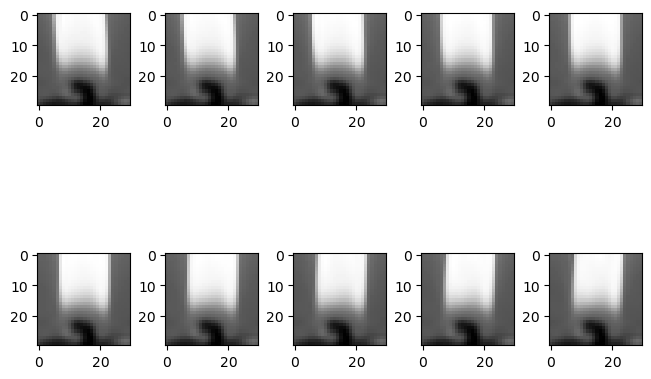

In [7]:
approx = HOSVD_rank_app(data_tensor,[8,9,5])
fig, axarr = plt.subplots(2,5,constrained_layout=True)
for i in range(5):
    axarr[0,i].imshow(approx.numpy()[:,:,i], cmap='gray')
for i in range(5):
    axarr[1,i].imshow(approx.numpy()[:,:,i+5], cmap='gray')

In [8]:
####################################################
## Compresssion using Gaussian Measurements ########
####################################################

np.random.seed(9)

X = data_tensor.numpy()
x = vectorize_np(X)
r = [8,9,5]
itr = 250
n_dim = np.shape(X)
n = n_dim[0]*n_dim[1]*n_dim[2]

m = int(n*30/100)
A_1 = np.random.normal(0.0,1.0,(n_dim[0],m))
A_2 = np.random.normal(0.0,1.0,(n_dim[1],m))
A_3 = np.random.normal(0.0,1.0,(n_dim[2],m))
A_4 = linalg.khatri_rao(A_1,linalg.khatri_rao(A_2,A_3))
A = A_4.T
b = A@x 

AA = np.random.normal(0.0,1.0,(m,n))
b_1 = AA@x 

y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = 1, itr = itr)
y_ATIHT, error_ATIHT = adaptive_TIHT(A,b,X,r,lamda = 1/m,mu = 1,itr=itr, numb_high = 550)
#y_IHT_2, error_IHT_2 = TIHT_HOSVD(A,b,X,r,lamda=1/m,itr = itr)

y_KZIHT_1, error_KZIHT_1 = KZIHT_HOSVD_RR(AA,b_1,X,n,r,gamma = 1, itr = itr)
y_ATIHT_1, error_ATIHT_1 = adaptive_TIHT(AA,b_1,X,r,lamda = 1/m,mu = 1,itr=itr, numb_high = 550)

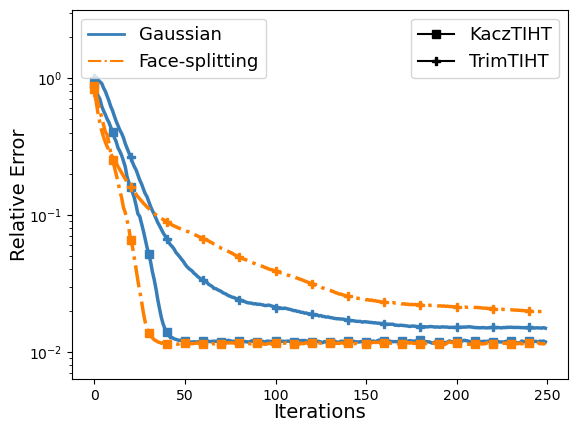

In [9]:
#######################################################
################### Convergence Plots #################
from matplotlib.lines import Line2D

plt.plot(range(250), error_KZIHT[:300], label = "KaczTIHT",marker='s',  markevery=10, color = colors[0],linewidth = 2.5)
plt.plot(range(250), error_ATIHT[:300], label = "TrimTIHT",marker='P',markevery=20,color = colors[0],linewidth = 2.5)
plt.plot(range(250), error_KZIHT_1[:300], label = "KaczTIHT",marker='s', markevery=10,  linestyle = "-.",color = colors[1],linewidth = 2.5)
plt.plot(range(250), error_ATIHT_1[:300], label = "TrimTIHT",marker='P',markevery=20,linestyle = "-.",color = colors[1],linewidth = 2.5)
#plt.plot(range(300), error_IHT_2[:300], label = "TIHT", color = colors[2])

custom_lines = [Line2D([0], [0], color=colors[0],linewidth = 2),
                Line2D([0], [0], color=colors[1],linestyle="-.")]
legend_1 = plt.legend(custom_lines, ['Gaussian','Face-splitting'], fontsize=13, loc = 'upper left')

custom_lines_2 = [Line2D([0], [0], color='black',marker = 's'),Line2D([0], [0], color='black',marker = 'P')]
plt.gca().add_artist(legend_1)

plt.legend(custom_lines_2, ['KaczTIHT','TrimTIHT'], loc = 'upper right',fontsize = 13)


plt.yscale("log")
plt.ylim(10**(-2.2), 10**(0.5))
plt.xlabel(xlabel=r'Iterations',labelpad = 0, fontsize = 14)
plt.ylabel(ylabel=r'Relative Error',labelpad = 0, fontsize = 14)
plt.savefig('Recovery_Candle.png', dpi=300,  bbox_inches="tight")



In [10]:
KZIHT_rec = np.reshape(y_KZIHT,(30,30,10))
ATIHT_rec = np.reshape(y_ATIHT,(30,30,10))
KZIHT_rec_1 = np.reshape(y_KZIHT_1,(30,30,10))
ATIHT_rec_1 = np.reshape(y_ATIHT_1,(30,30,10))

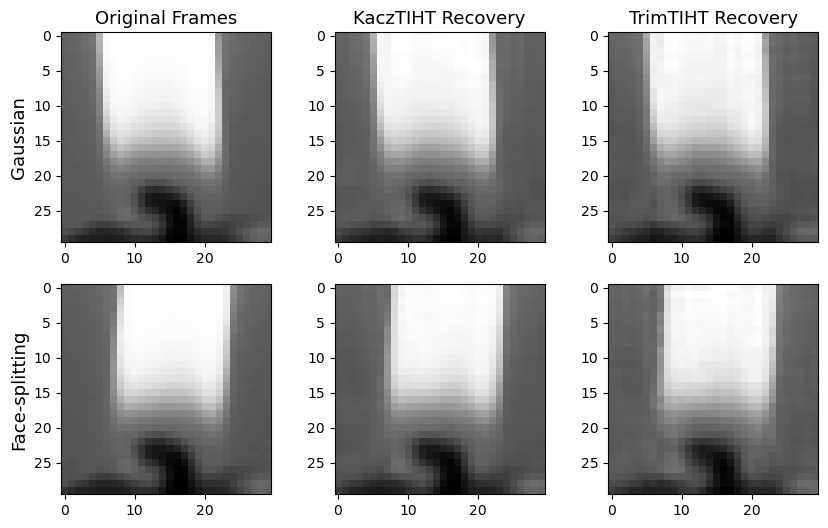

In [11]:
fig, axs = plt.subplots(2, 3)

fig.set_figheight(6)
fig.set_figwidth(10)

axs[0, 0].imshow(data_tensor[:,:,0], cmap='gray')
axs[0, 0].set_title('Original Frames',fontsize = 13)
axs[0,0].set_ylabel("Gaussian",fontsize = 13)
axs[1, 0].imshow(data_tensor[:,:,9], cmap='gray')

axs[0, 1].imshow(KZIHT_rec[:,:,0], cmap='gray')
axs[0, 1].set_title('KaczTIHT Recovery',fontsize = 13)

axs[0, 2].imshow(ATIHT_rec[:,:,0], cmap='gray')
axs[0, 2].set_title('TrimTIHT Recovery',fontsize = 13)

axs[1, 1].imshow(KZIHT_rec_1[:,:,9], cmap='gray')
axs[1,0].set_ylabel("Face-splitting",fontsize = 13)
axs[1, 2].imshow(ATIHT_rec_1[:,:,9], cmap='gray')
plt.savefig('Recovery_Candle_Img.png')